Model Parameters are: 

	 Queue length:			7 
 	 Pipeline length: 		10
	 Amount GtP:			2 
 	 Types of order carriers: 	2
	 To process orders:		150/200 
 	 Termination condition: 	3



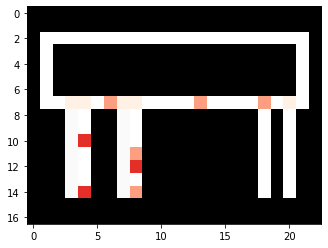

In [2]:
from rl.environments.AbstractConveyor import AbstractConveyor
import yaml
from stable_baselines import PPO2
from stable_baselines.common.vec_env import DummyVecEnv
import matplotlib.pyplot as plt
import rl.helpers
import cv2
import math
import random
import statistics as sts
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import datetime as dt
from os.path import join
import pathlib
import numpy as np


config_path = 'rl/config/AbstractConveyor.yml'
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)
env = AbstractConveyor(config)

print('Model Parameters are: \n')
print('\t Queue length:\t\t\t{} \n \t Pipeline length: \t\t{}'.format(env.gtp_buffer_length, env.pipeline_length))
print('\t Amount GtP:\t\t\t{} \n \t Types of order carriers: \t{}'.format(env.amount_of_gtps, env.amount_of_outputs))
print('\t To process orders:\t\t{}/{} \n \t Termination condition: \t{}\n'.format(env.max_items_processed, env.amount_of_gtps*env.gtp_demand_size, env.termination_condition))
env.render_plt()

In [54]:
def step_on_process_time(actions_list, threshold=5):
    """Function that takes steps based on remaining processing time at workstations"""
    
    for workstation in range(env.amount_of_gtps)[::-1]:
        rpt_w = env.W_times[workstation+1]
        rpt_q = sum([6 if item == 1 else 30 if item ==2 else 60 if item ==3 else 0 for item in env.in_queue[workstation]])
        rpt_p = sum([6 if item == 1 else 30 if item ==2 else 60 if item ==3 else 0 for item in [item[1] for item in env.items_on_conv if item[2]==workstation+1 and item[0][1]==7]])
        total_rpt = rpt_w + rpt_q + rpt_p
        total_pipe = env.pipeline_length + env.gtp_buffer_length + workstation * 4 + 2
        print(total_rpt - total_pipe)


        if total_rpt - total_pipe < threshold:
            try:
                current_demand = env.init_queues[workstation][len(env.in_pipe[workstation]):][0]
                actions_list.append((current_demand, workstation+1))
            except:
                pass

    #then for this step, process the first next action in the actions_list:
    try:
        order_type, goal = actions_list[0]
        actions_list = actions_list[1:]
        
    except:
        order_type, goal = 0, 0

    env.step(None, order_type, goal)

5
8
[]
{0: 0, 1: 0}


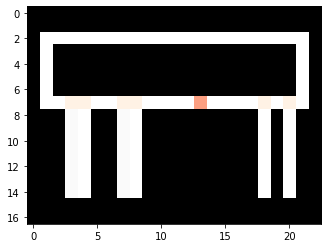

In [285]:
env.step_on_process_time()
print(env.actions_list)
print(env.idle_times_operator)
env.render_plt()

In [318]:
env.items_on_conv

[[[1, 5], 2, 1], [[13, 2], 2, 1], [[8, 14], 2, 1], [[18, 7], 1, 1]]

In [30]:
threshold=5

actions_list = []
for workstation in range(env.amount_of_gtps)[::-1]:
    rpt_w = env.W_times[workstation+1]
    rpt_q = sum([6 if item == 1 else 30 if item ==2 else 60 if item ==3 else 0 for item in env.in_queue[workstation]])
    rpt_p = sum([6 if item == 1 else 30 if item ==2 else 60 if item ==3 else 0 for item in [item[1] for item in env.items_on_conv if item[2]==workstation+1 and item[0][1]==7]])
    total_rpt = rpt_w + rpt_q + rpt_p
    total_pipe = env.pipeline_length + env.gtp_buffer_length + workstation * 4 + 2
    print(total_rpt, total_pipe)
    
    
    if total_rpt - total_pipe < threshold:
        try:
            current_demand = env.init_queues[workstation][len(env.in_pipe[workstation]):][0]
            actions_list.append((current_demand, workstation+1))
        except:
            pass

#then for this step, process the first next action in the actions_list:
try:
    order_type, goal = order_sequence[0]
except:
    order_type, goal = 0, 0
    
env.step(None, order_type, goal)

43 19
110 23


In [43]:
for workstation in range(env.amount_of_gtps)[::-1]:
    print(workstation)

1
0


In [40]:
workstation = 0
print(env.in_pipe[workstation])
env.init_queues[workstation][len(env.in_pipe[workstation]):][0]

[1]


1